# Ejercicio capitulo 3

#### 2. Periodo pendulo

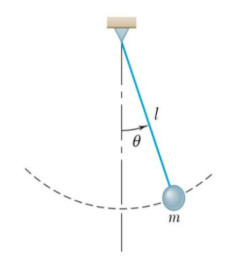

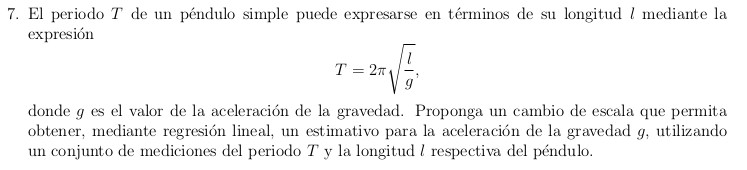

##### Solucion

Elevando a ambos lados de la ecuacion al cuadrado obtenemos: 
\begin{equation}
T^2 = 4 \pi^2 \dfrac{l}{g}, \quad \Rightarrow  \quad \dfrac{g}{ 4 \pi^2 } T^2 =  l
\end{equation}

De lo anterior vemos que la la variable $T^2$ y $l$ tienen una relación de proporcionalidad con constante $\dfrac{g}{ 4 \pi^2 }$.

Consideremos la siguientes datos de un pendulo:

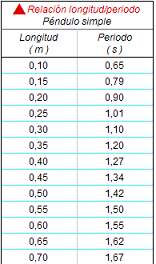

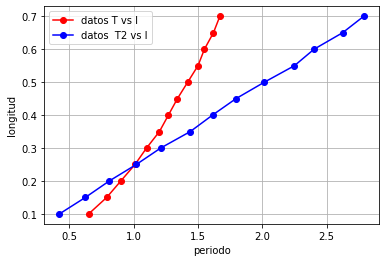

In [32]:
#Grafiquemos los datos
import numpy as np
import matplotlib.pyplot as plt



l  = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6 , 0.65, 0.70   ]
T  = [0.65,0.79,0.9,1.01,1.10,1.20,1.27,1.34,1.42,1.50,1.55 ,1.62, 1.67 ]
T2 = np.array(T)**2 # para elevar al cuadrado los periodos!

#importamos del módulo matplotlib la libreria pyplot con el alias de plt 


plt.plot( T  ,  l,  'ro-', label="datos T vs l"  )

plt.plot( T2 ,  l,  'bo-', label="datos  T2 vs l"  )

#mostrando las legendas del grafico
plt.xlabel("periodo")
plt.ylabel("longitud")
plt.grid()       
plt.legend()
plt.show()   


Usemos la regresion lineal para aproximar la pendiente!

In [37]:
#usando un modulo nuevo llamado scipy que tiene la regresion lineal programada!

from scipy.stats import linregress


resultado  = linregress( T2, l)

#para ver la pendiente e intercepto calculadas  
M = result.slope
b = result.intercept




#Calculemos el valor de la gravedad de nuestro analisis
g = 4* np.pi**2 * M

print("\n")
print("El valor de la aceleracion de la gravedad g es :", g , "m/s^2")
print("\n")




El valor de la aceleracion de la gravedad g es : 9.874535519314106 m/s^2




#### Simulando el movimiento del pendulo

Usando la fisica Newtoniana se obtiene ecuacion de movimiento del pendulo 
\begin{equation}
\dfrac{d^2 \theta}{d t^2} + \dfrac{g}{l}\sin\theta  = 0 .
\end{equation}
Como es una ecuacion diferencial de segundo orden, tenemos que definir la nueva variable $\omega = \dfrac{d\theta}{d t}$ y asi obtenemos el sistema: 

\begin{eqnarray}
\dfrac{d \theta}{d t} &=& \omega, \\
\dfrac{d \omega}{d t} &=& -\dfrac{g}{l}\sin\theta.
\end{eqnarray}

Luego, podemos resolver este sistema de ecuaciones diferenciales ordinarias de primer orden con el metodo de Euler.




In [40]:
#ACTIVAR GRAFICOS INTERACTIVOS EN EL NOTEBOOK
%matplotlib notebook

<IPython.core.display.Javascript object>


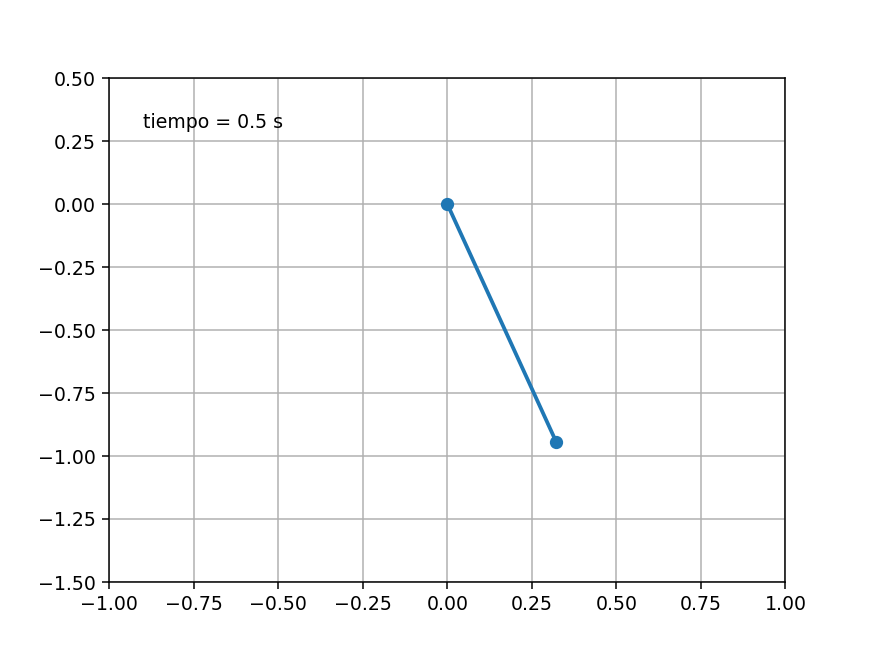

In [168]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

g  = 9.8
L  = 1

#dos condiciones por que es un sistema de segundo orden
theta0  = 0
omega0 = 1


#numero de pasos
Delta_t= 0.01
tiempos= np.arange(0, 10, Delta_t)

N_pasos = len(tiempos)
 

theta = np.zeros(N_pasos)
omega = np.zeros(N_pasos)

theta[0]  = theta0
omega[0] =  omega0

 
#usando el metodo de Euler
for i in range( N_pasos-1 ): 
    theta[i+1]  =  theta[i] + Delta_t * omega[i]  
    omega[i+1] =   omega[i] + Delta_t * (- (g/L)*np.sin(theta[i]) ) 

 
#Creando la escena de la figura
fig, ax = plt.subplots()
plt.grid()
ax.set_xlim(-1, 1)
ax.set_ylim(-1.5, 0.5) 


#para adicionar tiempo a la animacion
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

#para crear una linea
line, = ax.plot([], [], 'o-', lw=2)


def AnimacionPendulo(i):    
    #Pasando a coordenadas cartesianas
    x =  L*np.sin(theta[i])
    y = -L*np.cos(theta[i])
    
    #parejas de puntos
    x_puntos  = [0,x]
    y_puntos  = [0,y] 
           
    #colocando la parejas de puntos a la animacion    
    line.set_data(x_puntos, y_puntos)
    
    time_text.set_text('tiempo = %.1f s'% (tiempos[i]))    
    
    return line, 



animation = FuncAnimation(fig, func=AnimacionPendulo, frames= np.arange(1, len(theta)) , interval = 25)
plt.show()

##### Ejercicio opcional

 modificar el programa de la animacion para introducir el metodo de Adams.